<a href="https://colab.research.google.com/github/sandeeptuluri/Projects/blob/main/Lending_club_loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/sandeeptuluri/Linear-Regression/main/loan_data.csv')

In [ ]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
data.columns = ['Credit Policy', 'Loan Purpose', 'Interest Rate', 'Installment', 'Annual Income Log Report', 
                'Debt to Income Ratio', 'FICO Score', 'Days with Credit Line', 'Revolving balance', 'Revolving utilization rate', 
                'Inquiries in last Six Months', 'Delinquency Frequency', 'Public Derogatory Records', 'Will Default']

In [ ]:
data.head()

,Credit Policy,Loan Purpose,Interest Rate,Installment,Annual Income Log Report,Debt to Income Ratio,FICO Score,Days with Credit Line,Revolving balance,Revolving utilization rate,Inquiries in last Six Months,Delinquency Frequency,Public Derogatory Records,Will Default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit Policy                 9578 non-null   int64  
 1   Loan Purpose                  9578 non-null   object 
 2   Interest Rate                 9578 non-null   float64
 3   Installment                   9578 non-null   float64
 4   Annual Income Log Report      9578 non-null   float64
 5   Debt to Income Ratio          9578 non-null   float64
 6   FICO Score                    9578 non-null   int64  
 7   Days with Credit Line         9578 non-null   float64
 8   Revolving balance             9578 non-null   int64  
 9   Revolving utilization rate    9578 non-null   float64
 10  Inquiries in last Six Months  9578 non-null   int64  
 11  Delinquency Frequency         9578 non-null   int64  
 12  Public Derogatory Records     9578 non-null   int64  
 13  Wil

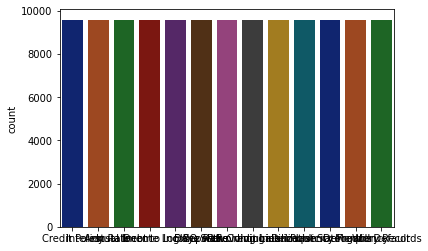

In [ ]:
sns.countplot(data=data, x=data.info(), palette='dark')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ft = LabelEncoder()
data_labels = ft.fit_transform(data['Loan Purpose'])
data_mappings = {index: label for index, label in enumerate(ft.classes_)}

In [ ]:
data_mappings

{0: 'all_other',
 1: 'credit_card',
 2: 'debt_consolidation',
 3: 'educational',
 4: 'home_improvement',
 5: 'major_purchase',
 6: 'small_business'}

In [ ]:
data['Loan Purpose'] = data_labels
data

,Credit Policy,Loan Purpose,Interest Rate,Installment,Annual Income Log Report,Debt to Income Ratio,FICO Score,Days with Credit Line,Revolving balance,Revolving utilization rate,Inquiries in last Six Months,Delinquency Frequency,Public Derogatory Records,Will Default
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
data['Loan Purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

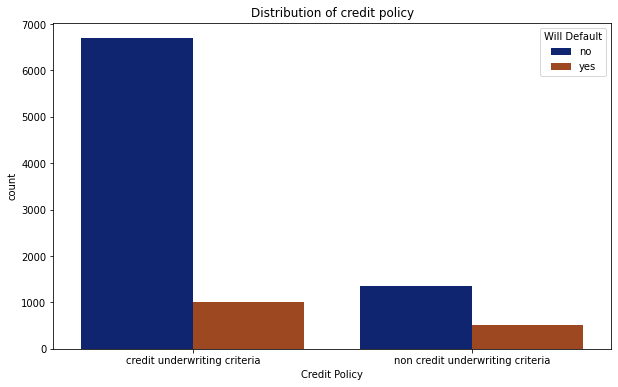

In [ ]:
data_policy = data.copy()
data_policy['Credit Policy'] = data_policy['Credit Policy'].map({0: 'non credit underwriting criteria',
                                  1: 'credit underwriting criteria'})
data_policy['Will Default'] = data_policy['Will Default'].map({0: 'no', 1: 'yes'})

plt.figure(figsize=(10,6))
sns.countplot(data = data_policy, x = 'Credit Policy', hue='Will Default',
              palette='dark')
plt.title('Distribution of credit policy')
plt.show()

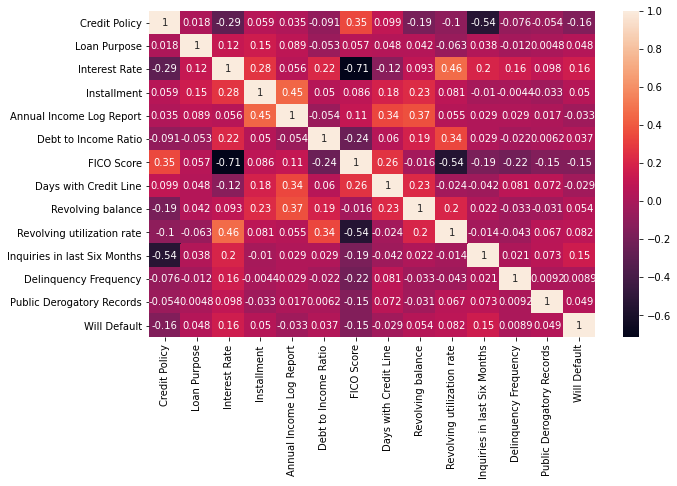

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

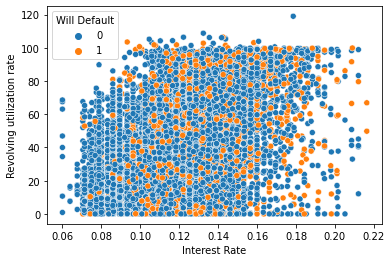

In [ ]:
sns.scatterplot(data=data, x='Interest Rate', 
                y='Revolving utilization rate', hue='Will Default')
plt.show()

In [ ]:
X = data.drop(['Will Default'],axis=1)
y = data['Will Default']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25)


In [ ]:
model.fit(X_train,y_train,epochs=300, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/300
210/210 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.6519 - val_loss: 0.6293 - val_accuracy: 0.8459
Epoch 2/300
210/210 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.8300 - val_loss: 0.5791 - val_accuracy: 0.8459
Epoch 3/300
210/210 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.8350 - val_loss: 0.5404 - val_accuracy: 0.8459
Epoch 4/300
210/210 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8355 - val_loss: 0.5111 - val_accuracy: 0.8459
Epoch 5/300
210/210 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.8377 - val_loss: 0.4888 - val_accuracy: 0.8459
Epoch 6/300
210/210 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.8334 - val_loss: 0.4720 - val_accuracy: 0.8459
Epoch 7/300
210/210 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.8417 - val_loss: 0.4593 - val_accuracy: 0.8459

In [ ]:
loss = pd.DataFrame(model.history.history)

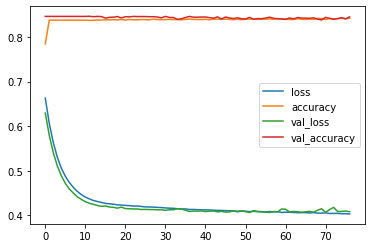

In [ ]:
loss.plot()

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' %loss)

Accuracy: 0.845
Loss: 0.408


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                266       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 527
Trainable params: 527
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions[0]

array([0.08921048], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
pred = []
for val in predictions:
  pred.append(np.argmax(val))
print(pred)

[]


In [ ]:
print(classification_report(y_test,predictions))

ValueError: ignored

In [ ]:
print(confusion_matrix(y_test, predictions))

ValueError: ignored